### **Predição do tráfego aéreo**


> Dupla: Denilson Pedro Coutinho da Silva, Vinicius dos Santos Silveira

> Objetivo: O objetivo desse projeto é construir um modelo para prever <br />o tráfego de passageiros em aviões. Os dados são classificados em <br />data/hora e os passageiros que viajam por mês.

### **O que são series temporais?**

>É uma série de observações feitas em intervalos <br />de tempo especificados, geralmente intervalos iguais. <br />A análise da série nos ajuda a prever valores futuros com base <br />em valores observados anteriores. Na série temporal, <br />temos apenas 2 variáveis, tempo e a variável que queremos prever.

---

### **Quais são os componentes da Série Temporal?**

>Existem 3 componentes:
>*   ***Tendência*** - Movimento ascendente e descendente dos dados com o tempo durante um grande período de tempo. Ex.: Valorização do dólar vs real.
>*   ***Sazonalidade*** - Variações sazonais. Ex.: Vendas de sorvetes aumentam apenas no verão.
>* ***Ruído*** - O componente irregular que consiste nas flutuações na série temporal após a remoção dos componentes anteriores

---

### **O que é Estacionaridade?**

>Antes de aplicar qualquer modelo estatístico em uma série temporal, a série deve ser estacionária, o que significa que, em diferentes períodos de tempo a série:
>* Deve ter média constante
>* Deve ter variância/desvio padrão constante
>* Não deve ter autocovariância dependente do tempo

In [165]:
from datetime import datetime

import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pylab as plt
%matplotlib inline

### **Carregando os dados para o modelo**

In [166]:
path = "/content/drive/MyDrive/TimeSeries/AirPassengers.csv"
df = pd.read_csv(path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### **Formatando os dados de tempo**

>Observando o formato dos dados, percebemos que é necessário transformar os dados de _string_ para _datetime_ e também definir a coluna _Month_ como _index_ do dataframe

In [167]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
indexedDf = df.set_index(['Month'])
indexedDf.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### **Analisando os dados graficamente**

>A partir do gráfico abaixo, podemos ver que há um componente de tendência na série. Com isso, verificaremos a estacionaridade dos dados

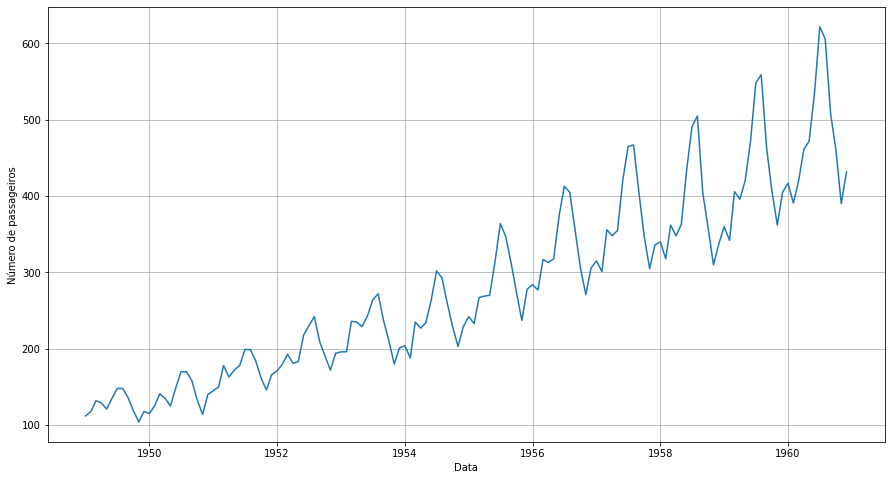

In [168]:
plt.figure(figsize=(15,8))

plt.xlabel('Data')
plt.ylabel('Número de passageiros')
plt.plot(indexedDf)

plt.grid()

#### Definição da média móvel e desvio padrão
> O parâmetro _window_=12 denota 12 meses, <br />retornando a média móvel/desvio padrão a nível anual.

In [169]:
rolmean = indexedDf.rolling(window=12).mean()
rolstd = indexedDf.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


#### **Podemos agora visualizar os valores obtidos acima da média móvel/desvio padrão**

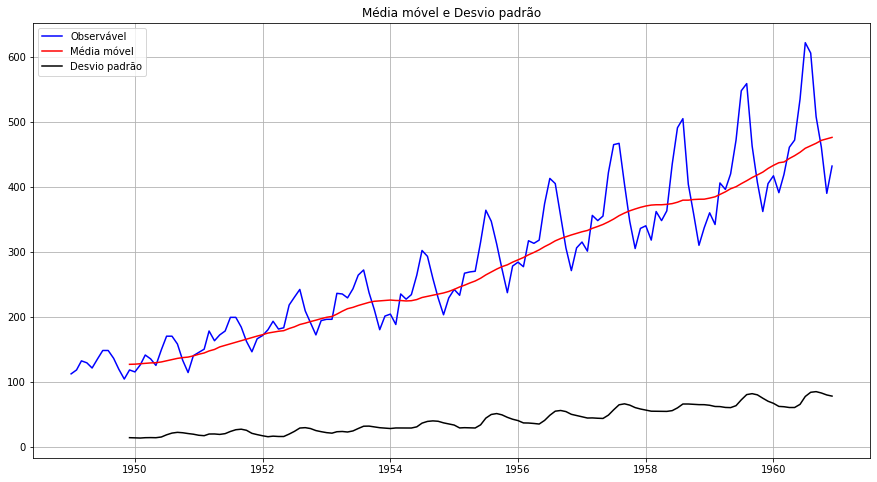

In [170]:
plt.figure(figsize=(15,8))

orig = plt.plot(indexedDf, color='blue', label='Observável')
mean = plt.plot(rolmean, color='red', label='Média móvel')
std = plt.plot(rolstd, color='black', label='Desvio padrão')
plt.legend(loc='Melhor')
plt.title('Média móvel e Desvio padrão')

plt.grid()
plt.show(block=False)

#### **Fazendo o teste de estacionaridade**
>No gráfico acima, vemos que a própria média móvel tem um componente de tendência, embora o desvio padrão contínuo seja bastante constante com o tempo. Para que nossa série temporal seja estacionária, precisamos garantir que ambas as estatísticas móveis, ou seja: média e desvio padrão, permaneçam invariantes no tempo ou constantes com o tempo. Assim, as curvas para ambos têm que ser paralelas ao eixo x, o que no nosso caso não é assim.<br />
>Para aumentar ainda mais nossa hipótese de que a série temporal não é estacionária, vamos realizar o teste ADCF.

In [171]:
def stationary_test(dataset):

  movingAverage = dataset.rolling(window=12).mean()
  movingSTD = dataset.rolling(window=12).std()

  orig = plt.plot(dataset, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Média móvel')
  std = plt.plot(movingSTD, color='black', label='Desvio padrão')
  plt.legend(loc='Melhor')
  plt.title('Média móvel e desvio padrão')
  plt.show(block=False)

  stationary_test = adfuller(dataset)
  test_result = pd.Series(stationary_test[0:4], index=['Test statistics', 'p-value', 'Lags used', 'Number of used observation'])

  print(test_result)

O critério para que se possa afirmar que a série é estacionaria ou não, é o seguinte:

>- Se p-value > 0.05 a serie não é estacionária
>- Se p-value <= 0.05 a serei é estacionaria

A partir do resultado do teste ADCF acima, vemos que o _p-value_ é muito grande. Os valores críticos também não estão nem perto das estatísticas de teste. Portanto, podemos dizer com segurança que nossa **série temporal não é estacionária**.

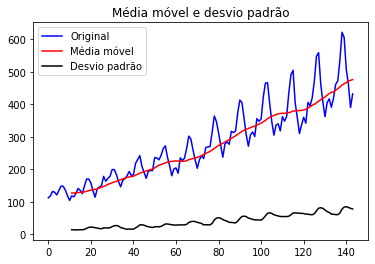

Test statistics                 0.815369
p-value                         0.991880
Lags used                      13.000000
Number of used observation    130.000000
dtype: float64


In [172]:
values = df['#Passengers']
stationary_test(values)

### **Transformação de dados para alcançar a estacionaridade**

Existem várias maneiras para se acalançar a estacionaridade na<br />
série temporal, neste projeto aplicaremos a transformação de escala de log.

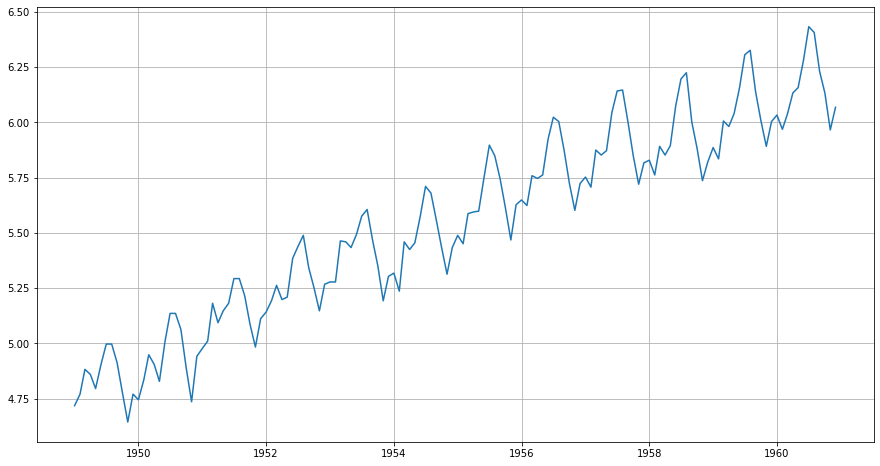

In [173]:
plt.figure(figsize=(15,8))

#Estimativa de tendência
indexedDf_logScale = np.log(indexedDf)
plt.plot(indexedDf_logScale)

plt.grid()

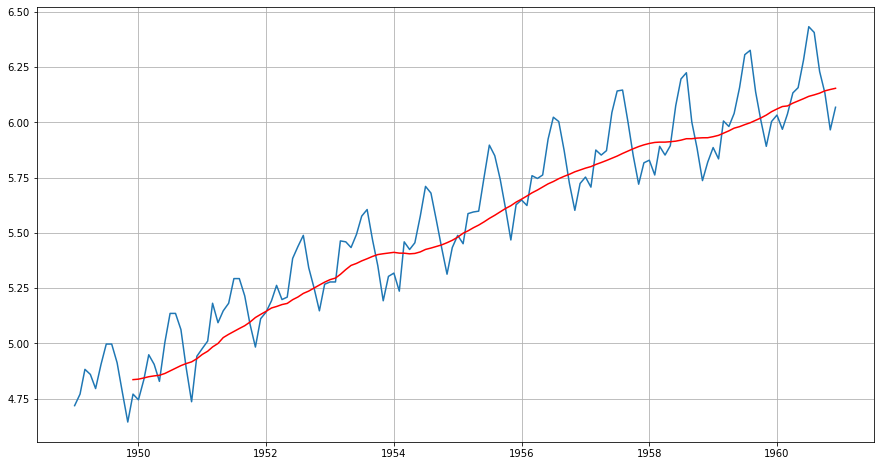

In [174]:
plt.figure(figsize=(15,8))

# A transformação abaixo é necessária para tornar a série estacionária
movingAverage = indexedDf_logScale.rolling(window=12).mean()
movingSTD = indexedDf_logScale.rolling(window=12).std()

plt.plot(indexedDf_logScale)
plt.plot(movingAverage, color='red')

plt.grid()

Sabemos do gráfico acima que tanto a série temporal com escala logarítmica quanto sua média móvel possuem um componente de tendência. Assim, podemos aplicar uma intuição elementar: subtrair um do outro deve remover o componente de tendência de ambos. Dessa forma:


>logScale $L$ $=$ stationaryPart$(L1)$ $+$ trend$(LT)$<br />
>movingAvgOfLogScale $A$ $=$ stationaryPart$(A1)$ $+$ trend$(AT)$<br />
>resultSeries$R = L−A=(L1+LT)−(A1+AT)=(L1−A1)+(LT−AT)$

Como $L$ e $A$ são séries e média móvel, sua tendência será mais ou menos a mesma, portanto
$LT-AT$ é aproximadamente igual a $0$

Assim, o componente de tendência será quase removido. E nós temos,

$R=L1−A1$ , nossa curva final sem tendência.

In [175]:
datasetLogScaleMinusMovingAverage = indexedDf_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

# Removendo valores nulos 'NaN'
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


### Aplicando o teste ADCF nos novos dados

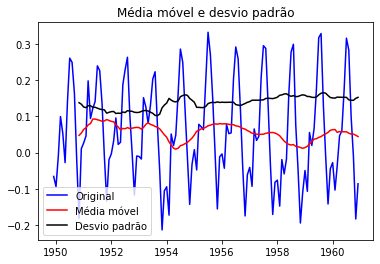

Test statistics                -3.162908
p-value                         0.022235
Lags used                      13.000000
Number of used observation    119.000000
dtype: float64


In [176]:
stationary_test(datasetLogScaleMinusMovingAverage)

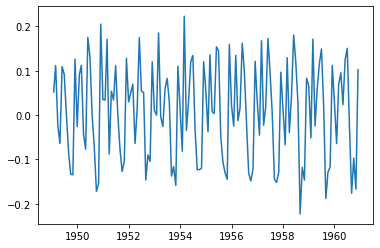

In [177]:
datasetLogDiffShifting = indexedDf_logScale - indexedDf_logScale.shift()
plt.plot(datasetLogDiffShifting)

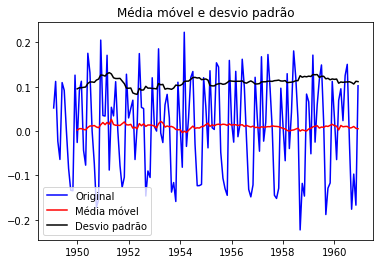

Test statistics                -2.717131
p-value                         0.071121
Lags used                      14.000000
Number of used observation    128.000000
dtype: float64


In [178]:
datasetLogDiffShifting.dropna(inplace=True)
stationary_test(datasetLogDiffShifting)

### **Decompondo a série temporal**

> Para esse processo usaremos a biblioteca _statsmodels.tsa.seasonal_. Com ela é possível separar a série nas 3 componentes que já foram descritas.


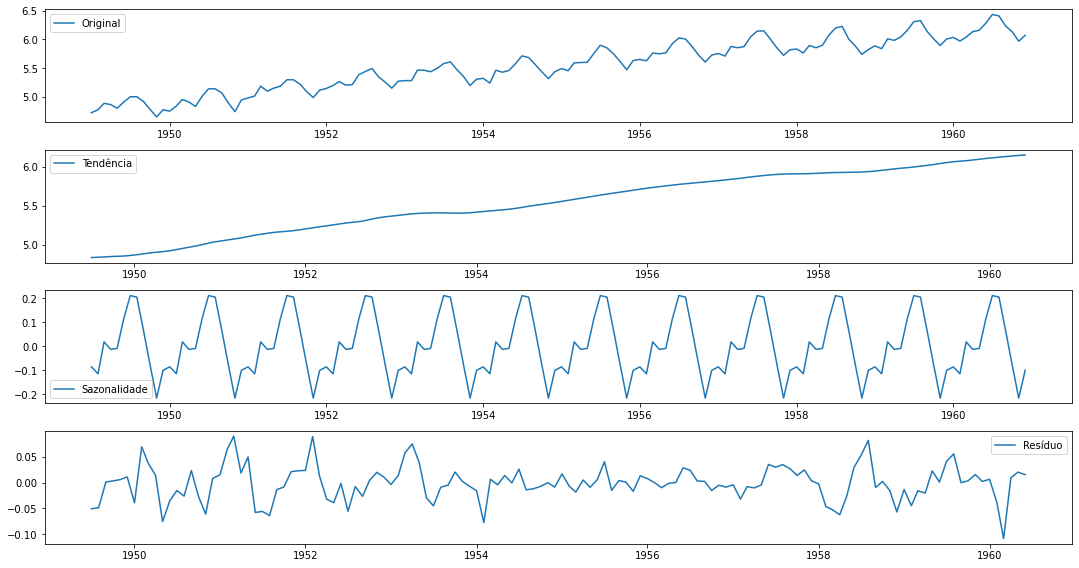

In [179]:
decomposition = seasonal_decompose(indexedDf_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

plt.figure(figsize=(15,8))

plt.subplot(411)
plt.plot(indexedDf_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resid, label='Resíduo')
plt.legend(loc='best')

plt.tight_layout()

Na decomposição pode haver casos em que uma observação consistiu simplesmente em tendência e sazonalidade. Nesse caso, não haverá nenhum componente residual e isso seria um nulo ou NaN. Portanto, também removemos esses casos.

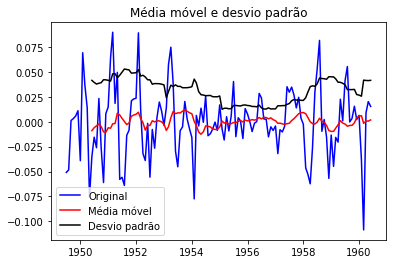

Test statistics              -6.332387e+00
p-value                       2.885059e-08
Lags used                     9.000000e+00
Number of used observation    1.220000e+02
dtype: float64


In [180]:
decomposedLogData = resid
decomposedLogData.dropna(inplace=True)
stationary_test(decomposedLogData)

### **Plotando ACF & PACF**

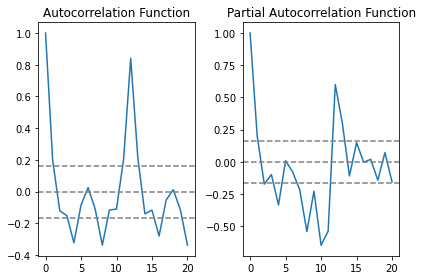

In [181]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

ARIMA é AR + I + MA. Antes, de vermos um modelo ARIMA, vamos verificar os resultados do modelo AR e MA individualmente. Observe que esses modelos fornecerão um valor de RSS. Valores RSS mais baixos indicam um modelo melhor.

Text(0.5, 1.0, 'RSS: 1.5023')

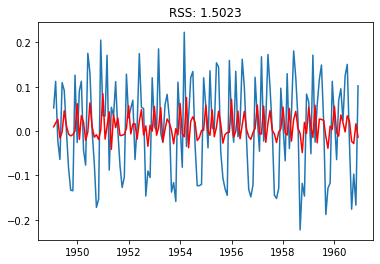

In [182]:
#AR Model
model = ARIMA(indexedDf_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

Text(0.5, 1.0, 'RSS: 1.4721')

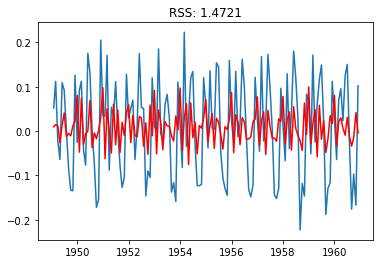

In [183]:
#MA Model
model = ARIMA(indexedDf_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

Text(0.5, 1.0, 'RSS: 1.0292')

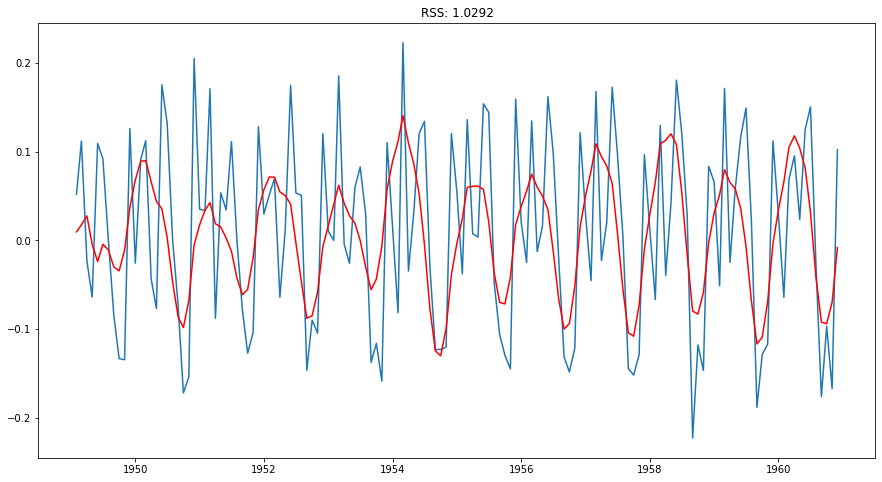

In [190]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDf_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

Ao combinar AR e MA em ARIMA, vemos que o valor do RSS diminuiu de ambos os casos para 1,0292, indicando que o ARIMA é melhor do que seus modelos de componentes individuais.

Com o modelo ARIMA construído, agora vamos gerar previsões. Mas, antes de fazermos quaisquer gráficos para previsões, precisamos reconverter as previsões de volta à forma original. Isso ocorre porque nosso modelo foi construído em dados transformados em log.

### **Predição e reversão das transformações**

In [185]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [186]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372553
1960-09-01    1.280203
1960-10-01    1.186190
1960-11-01    1.116266
1960-12-01    1.108140
Length: 143, dtype: float64


In [187]:
predictions_ARIMA_log = pd.Series(indexedDf_logScale['#Passengers'].iloc[0], index=indexedDf_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Observando o gráfico abaixo vemos que nossas previsões (em laranja) previstas estão muito próximas dos valores da série temporal real, indicando um modelo bastante preciso.

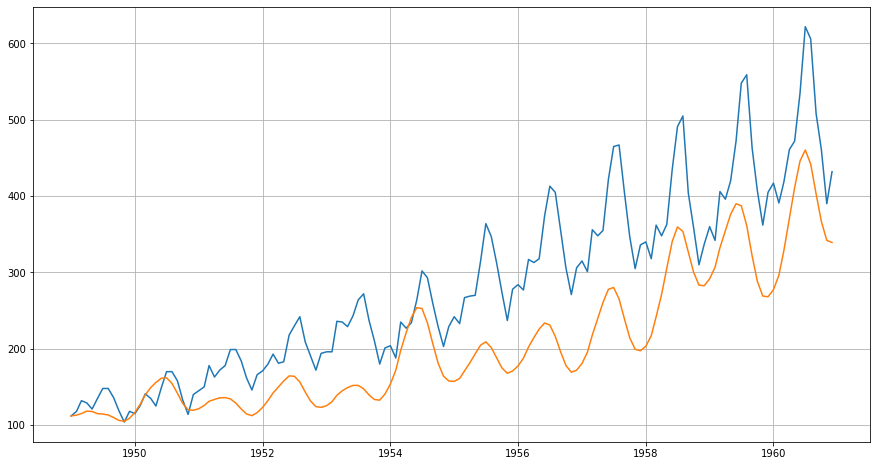

In [188]:
# O inverso do log é a exponencial.

plt.figure(figsize=(15,8))

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDf)
plt.plot(predictions_ARIMA)

plt.grid()

### **Plotando o gráfico da predição**

#### Predizendo valores futuros com o modelo treinado.

> Temos 144 (dados existentes de 12 anos em meses) instância de dados e queremos prever 120 pontos de dados adicionais ou 10 anos.

```
indexedDf_logScale.shape = (144, 1)
```



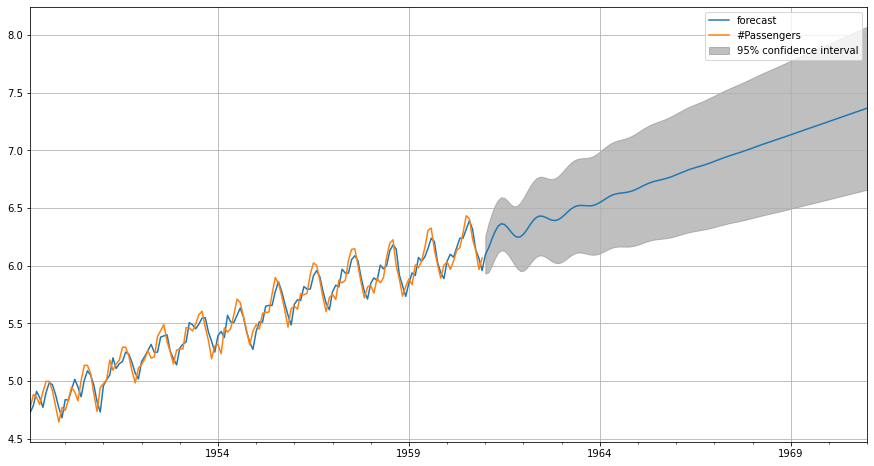

In [189]:
plt.rcParams["figure.figsize"] = [15, 8]

startPredict = 1
endPredict = indexedDf_logScale.shape[0] + 12 * 10 ## 10 anos

results_ARIMA.plot_predict(startPredict, endPredict)

plt.grid()